In [224]:
import tensorflow as tf
import cv2
  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, 
confusion_matrix,accuracy_score, ConfusionMatrixDisplay

In [225]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [226]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [227]:
train_images[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
          0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212, 205, 185,
        179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  85,  76, 199, 225,
        248, 255, 238, 226, 157,  68,  80,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91,  69,  91, 201,
        218, 225, 209, 158,  61,  93,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79,  89,  61,  59,
         87, 108,  75,  56,  76,  97,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,  89,  80,  80,
         67,  63,  73,  83,  80,  96,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [110]:
def show_examples(data, classes, data_labels):
    plt.figure(figsize=(15,15))
    for i in range(20):
        plt.subplot(5,5,i+1)
        index = np.random.randint(0,len(data))
        plt.imshow(data[index], cmap='Greys')
        plt.title( classes[data_labels[index]])
        plt.axis(False)


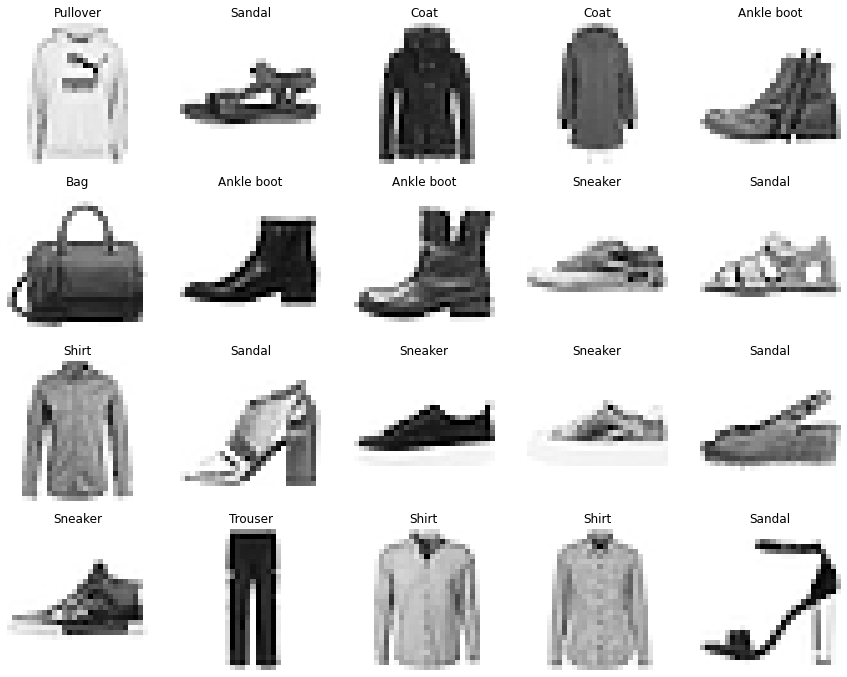

In [111]:
show_examples(train_images, class_names, train_labels)

In [228]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [259]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(28,28,1)),
    tf.keras.layers.RandomZoom(0.05),
  ]
)

In [260]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

model = tf.keras.models.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [261]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [262]:
history = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels), epochs=15)

Epoch 1/15


C:\Users\Public\jupyter\envs\tensorflow\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1875/1875 [==============================] - 82s 43ms/step - loss: 0.4665 - accuracy: 0.8308 - val_loss: 0.3551 - val_accuracy: 0.8696
Epoch 2/15
1875/1875 [==============================] - 83s 44ms/step - loss: 0.3181 - accuracy: 0.8831 - val_loss: 0.3789 - val_accuracy: 0.8608
Epoch 3/15
1875/1875 [==============================] - 90s 48ms/step - loss: 0.2746 - accuracy: 0.8992 - val_loss: 0.2888 - val_accuracy: 0.8923
Epoch 4/15
1875/1875 [==============================] - 103s 55ms/step - loss: 0.2448 - accuracy: 0.9082 - val_loss: 0.2667 - val_accuracy: 0.9005
Epoch 5/15
1875/1875 [==============================] - 90s 48ms/step - loss: 0.2250 - accuracy: 0.9154 - val_loss: 0.2702 - val_accuracy: 0.9043
Epoch 6/15
1875/1875 [==============================] - 101s 54ms/step - loss: 0.2097 - accuracy: 0.9219 - val_loss: 0.2598 - val_accuracy: 0.9065
Epoch 7/15
1875/1875 [==============================] - 97s 51ms/step - loss: 0.1948 - accuracy: 0.9273 - val_loss: 0.2499 - val_accu

In [233]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.2804 - accuracy: 0.9138

Test accuracy: 0.9138000011444092


In [113]:
model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               409728    
_________________________________________________________________
dense_13 (Dense)             (None, 10)              

In [117]:

model_new = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_new.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [139]:
history2 = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.2422 - accuracy: 0.9092 - val_loss: 0.2782 - val_accuracy: 0.9009
Epoch 2/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2414 - accuracy: 0.9092 - val_loss: 0.2729 - val_accuracy: 0.9055
Epoch 3/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.2339 - accuracy: 0.9114 - val_loss: 0.2828 - val_accuracy: 0.9008
Epoch 4/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2268 - accuracy: 0.9147 - val_loss: 0.2848 - val_accuracy: 0.8990
Epoch 5/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2269 - accuracy: 0.9150 - val_loss: 0.2753 - val_accuracy: 0.9091


In [140]:
acc = history.history['accuracy'] + history2.history['accuracy']
val_acc = history.history['val_accuracy'] + history2.history['val_accuracy']

loss = history.history['loss'] + history2.history['loss']
val_loss = history.history['val_loss'] + history2.history['val_loss']

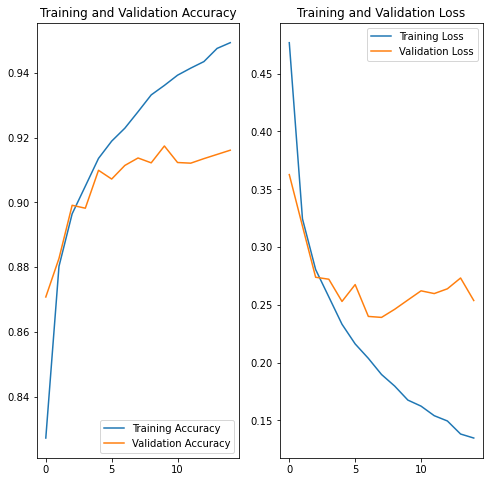

In [179]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

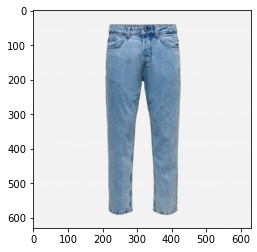

In [12]:

# Let's load a simple image with 3 black squares


#plt.imshow('image', image)
#plt.show()
#cv2.waitKey()

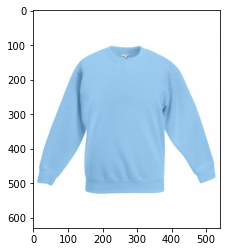

In [252]:
path = r'C:\sweatshirt.jpg'
image = cv2.imread(path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [253]:
def make_square(image):
    height_middle = image.shape[0]/2
    width_middle = image.shape[1]/2
    #center = image.shape // 2.0
    if height_middle == width_middle:
        return image
    if height_middle > width_middle:
        image = image[int(height_middle - width_middle):
                      int(height_middle + width_middle),:]
    else:
        image = image[:,int(weight_middle - height_middle):
                      int(weight_middle + height_middle)]
    return image

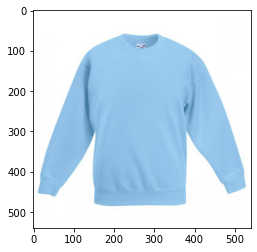

In [254]:
image = make_square(image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [255]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)
print("shape: ", resized.shape)
lower=np.array([240])
upper=np.array([255])
mask = cv2.inRange(resized,lower,upper)
resized[mask>0]=(255)

shape:  (28, 28)


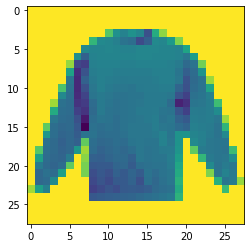

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 225 199 192 199 194 170 212 236
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 217 195 194 191 185 183 168 176 195 194
  203 233 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 195 193 193 194 193 192 192 194 194 194 193
  193 192 208 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 198 177 192 193 193 193 193 193 194 194 193 193
  193 192 187 205 255 255 255 255 255 255]
 [255 255 255 255 255 237 166 163 191 192 192 192 191 191 192 192 192 192
  191 189 181 185 231 255 255 255 255 255]
 [255 255 255 255 255 207 157 171 190 191 191 190 190 190 190 19

In [256]:
plt.imshow(resized)
plt.show()
print(resized)

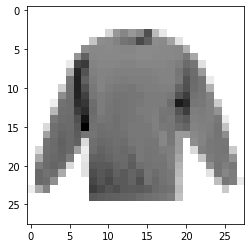

In [257]:
resized = 255 - resized
plt.imshow(resized, cmap='Greys')
plt.show()

In [264]:
resized = resized.reshape(28, 28, 1)
arr = np.array([resized])
arr.shape
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(arr)
print(predictions[0])
class_names[np.argmax(predictions[0])]

[0.08688467 0.08553042 0.08553042 0.08553042 0.08553042 0.08553042
 0.22887191 0.08553042 0.08553042 0.08553042]


'Shirt'

In [45]:
predictions = probability_model.predict(arr)
print(predictions[0])
class_names[np.argmax(predictions[0])]

[0.08533674 0.08533674 0.08533674 0.08533674 0.08533674 0.08533674
 0.23196931 0.08533674 0.08533674 0.08533674]


'Shirt'

In [36]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

array([0.08533726, 0.08533686, 0.08533686, 0.08533689, 0.08533686,
       0.08533686, 0.08533701, 0.08533686, 0.23196763, 0.085337  ],
      dtype=float32)

In [19]:
test_images.shape

(10000, 28, 28, 1)

In [183]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 4s - loss: 0.2537 - accuracy: 0.9161

Test accuracy: 0.916100025177002


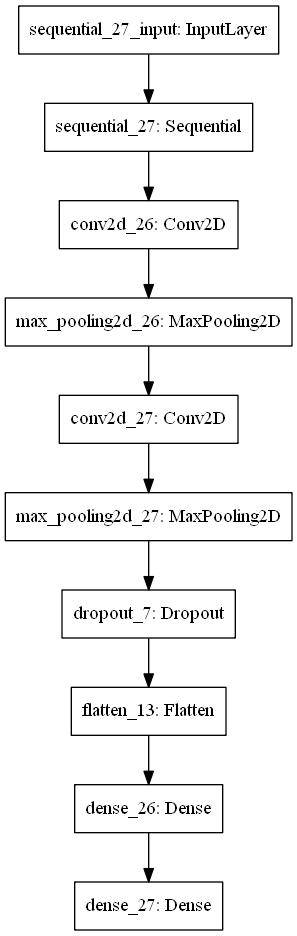

In [182]:
tf.keras.utils.plot_model(model)

In [235]:
pred = model.predict(test_images)
pred = pred.argmax(axis=1)

(10000,)

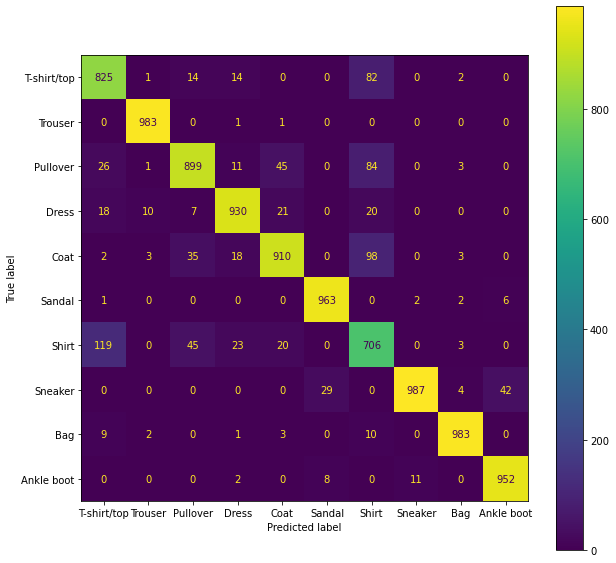

In [236]:
cm=confusion_matrix(pred ,test_labels)
 
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig,ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);